# **Loan Approved or Not Prediction**
---

## Institute: International Institute of Professional Studies, DAVV, Indore

### Assignment: Build and Evaluate a Predictive Model on a Real-World Dataset

- **Name:** Yashvardhan Bhawnani
- **Roll No.:** IT-2K21-67
- **Course:** M.Tech (IT) – IX Semester
- **Subject:** Machine Learning

---
## 🎯 **Objective**

To build and evaluate predictive models using **Logistic Regression** and **Random Forest** for predicting loan approval.

The model will be trained using the **Loan Approval Dataset** which contains applicant data such as income, credit_score, and loan_amount.

---

## 📁 **Steps Overview**

1.  *Data Selection*
    -   Use the provided real-world dataset (`loan_approval.csv`)
    -   Import dataset into the Python script
      

2.  *Data Preprocessing & EDA*
    -   Handle missing and invalid data (e.g., 0s in `loan_amount`)
    -   Visualize data distributions and correlations

3.  *Model Building*
    -   Train Logistic Regression and Random Forest models
    -   Perform cross-validation and hyperparameter tuning (`GridSearchCV`)

4.  *Evaluation*
    -   Compare models using Accuracy, F1-Score, Confusion Matrix, and ROC Curve

5.  *Report & Results Discussion*
    -   Discuss findings, insights, and model comparison
---

## Dataset Overview 

---

## 🧩 Step 2: Data Preprocessing & Exploratory Data Analysis (EDA)

In this step, we prepare the dataset for machine learning by performing:
- **Data cleaning** (handling missing and invalid values)
- **Statistical summary and information overview
- **Visualization of feature distributions and correlations
- **Feature scaling for better model performance

This ensures the dataset is accurate, balanced, and ready for model training.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")
db = pd.read_csv("loan_approval.csv")
print("\n Dataset Loaded Successfully!\n")

pd.set_option('display.max_columns', None)
print("First 10 Rows:")
print(db.head(10))

print("\n Shape of Dataset:", db.shape)

print("\n Dataset Information:")
print(db.info())

print("\n Summary Statistics:")
print(db.describe())


 Dataset Loaded Successfully!

First 10 Rows:
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   
5   Darren Roberts   Port Jesseville   62098           689        19217   
6       Holly Wood       Lake Joseph   59256           373        40920   
7  Nicholas Martin        Nelsonside   48289           524        45866   
8      Patty Perez   Port Leslieview  126530           367        14826   
9       Emily Rios    Wilkersonmouth   43434           446        18359   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False 

---
### 🔹 Basic Dataset Information & Missing Value Check

We first inspect the dataset structure, datatypes, and check for any missing or invalid values.
In the loan approval dataset, some columns have zeros where actual values cannot be zero (e.g., `loan_amount`).
These will be replaced with NaN and imputed later.

In [4]:
try:
    db = pd.read_csv("loan_approval.csv")
except FileNotFoundError:
    print("Error: loan_approval.csv not found.")
    exit()

print("--- Initial Data Inspection ---")
print(db.head())
print("\n--- Data Types ---")
db.info()


db_analysis = db.drop(['name', 'city'], axis=1)


db_analysis['loan_approved'] = db_analysis['loan_approved'].astype(int)


print("\n Checking for Missing Values (Initial):")
print(db_analysis.isnull().sum())


columns_with_zero = ['loan_amount']

db_analysis[columns_with_zero] = db_analysis[columns_with_zero].replace(0, np.nan)

print("\n Missing values after replacing 0s with NaN:")
print(db_analysis.isnull().sum())

--- Initial Data Inspection ---
              name              city  income  credit_score  loan_amount  \
0     Allison Hill         East Jill  113810           389        39698   
1     Brandon Hall     New Jamesside   44592           729        15446   
2     Rhonda Smith      Lake Roberto   33278           584        11189   
3  Gabrielle Davis  West Melanieview  127196           344        48823   
4     Valerie Gray         Mariastad   66048           496        47174   

   years_employed  points  loan_approved  
0              27    50.0          False  
1              28    55.0          False  
2              13    45.0          False  
3              29    50.0          False  
4               4    25.0          False  

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object

---
### 🔹 Handling Missing Values

To maintain dataset consistency, missing (NaN) values (including the 0s in `loan_amount`) are filled using the *median* of each respective column.
The median is preferred over the mean as it reduces the impact of outliers, which can be present in features like `income` or `loan_amount`.

In [5]:
for col in numeric_cols:
    if db_analysis[col].isnull().sum() > 0:
        print(f"Imputing missing values in '{col}' with median...")
        db_analysis[col].fillna(db_analysis[col].median(), inplace=True)

print("\n Missing values handled successfully!")
print(db_analysis.isnull().sum())


 Missing values handled successfully!
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


---
### 📊 Data Visualization – Feature Distributions

To understand the spread of data and identify skewness or unusual patterns, we visualize our features. Since the non-numeric features (`name`, `city`) are dropped to prepare for modeling, we focus on the distributions of the numerical data:

* **Histograms:** Plotted for all numerical features (like `income`, `credit_score`, `loan_amount`, and `points`) to see their spread and central tendency. The distribution of the `loan_approved` target variable is also plotted, which helps in understanding the class balance.


Plotting Distributions...
Saved feature distributions plot to 'loan_feature_distributions.png'


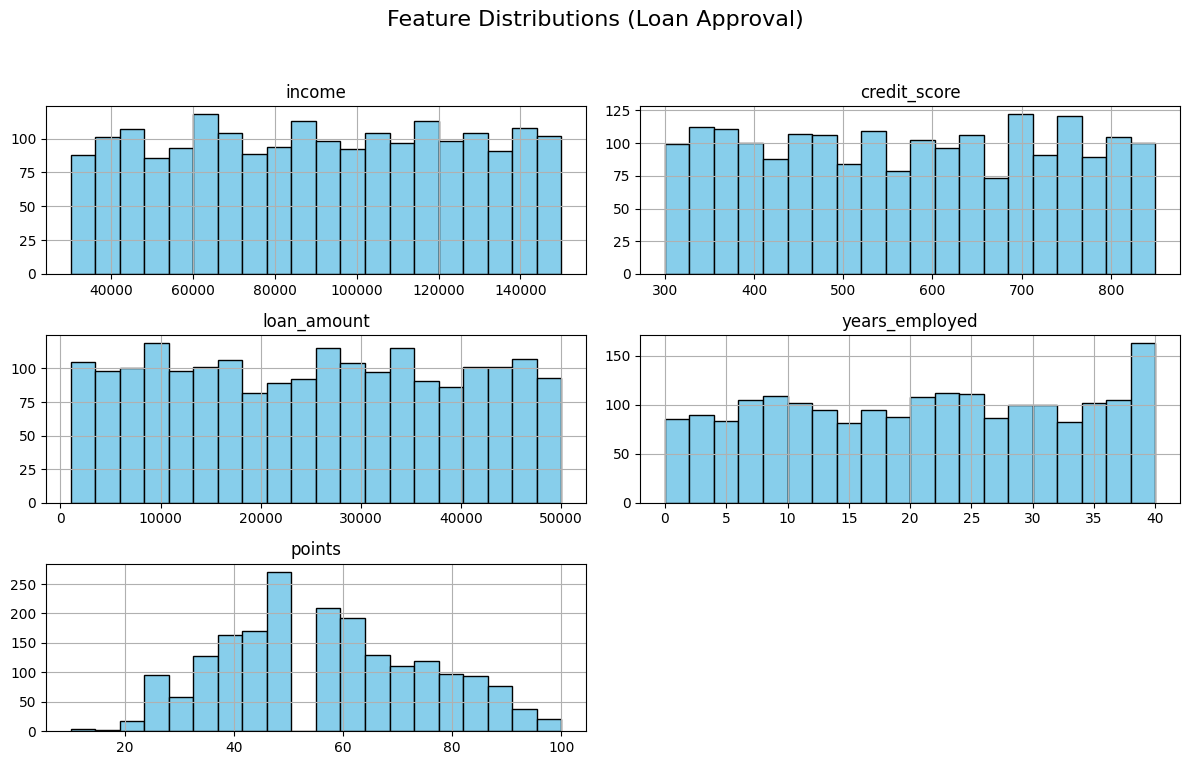

In [9]:
print("\nPlotting Distributions...")
try:
    db_analysis.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle("Feature Distributions (Loan Approval)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('loan_feature_distributions.png')
    print("Saved feature distributions plot to 'loan_feature_distributions.png'")
    plt.show()
except Exception as e:
    print(f"Error plotting histograms: {e}")

#### 🧠 Insights from Distribution Plots

-   Most features, particularly `income` and `loan_amount`, are **right-skewed**, indicating non-normal distributions.
-   **`credit_score`** and **`income`** are likely to show the most distinct separation between approved and denied loan applications.
-   The **`loan_amount`** feature had invalid zero values, which were handled by median imputation.

---
### 🔥 Correlation Analysis

We analyze correlations between features to identify which variables are most related to the target (`loan_approved`).
A heatmap visually represents these correlations.


Correlation Heatmap:
Saved correlation heatmap to 'loan_correlation_heatmap.png'


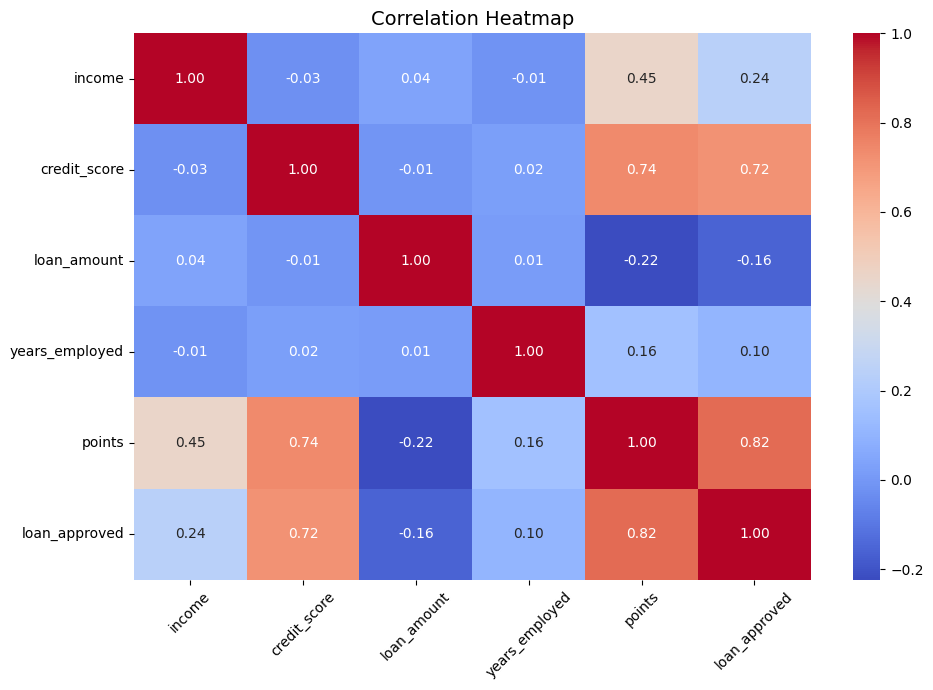

In [10]:
import seaborn as sns
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 7))
sns.heatmap(db_analysis.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('loan_correlation_heatmap.png')
print("Saved correlation heatmap to 'loan_correlation_heatmap.png'")
plt.show()

#### 🧠 Insights from Heatmap

-   **`points`** has the *highest positive correlation* with `loan_approved` (~0.82).
-   **`credit_score`** also shows a strong positive correlation (~0.72).
-   `income` shows a weaker positive correlation.
-   `loan_amount` has a slight negative correlation, suggesting that, all else being equal, larger loan amounts are slightly less likely to be approved.
-   Multicollinearity (high correlation between features) is minimal, so all features can be retained for modeling.

---
### 📦 Outlier Detection using Boxplots

We use boxplots to visually inspect the range and detect possible outliers
in continuous features like `income`, `loan_amount`, and `credit_score`.


 Visualizing Outliers:
Saved boxplots to 'loan_feature_boxplots.png'


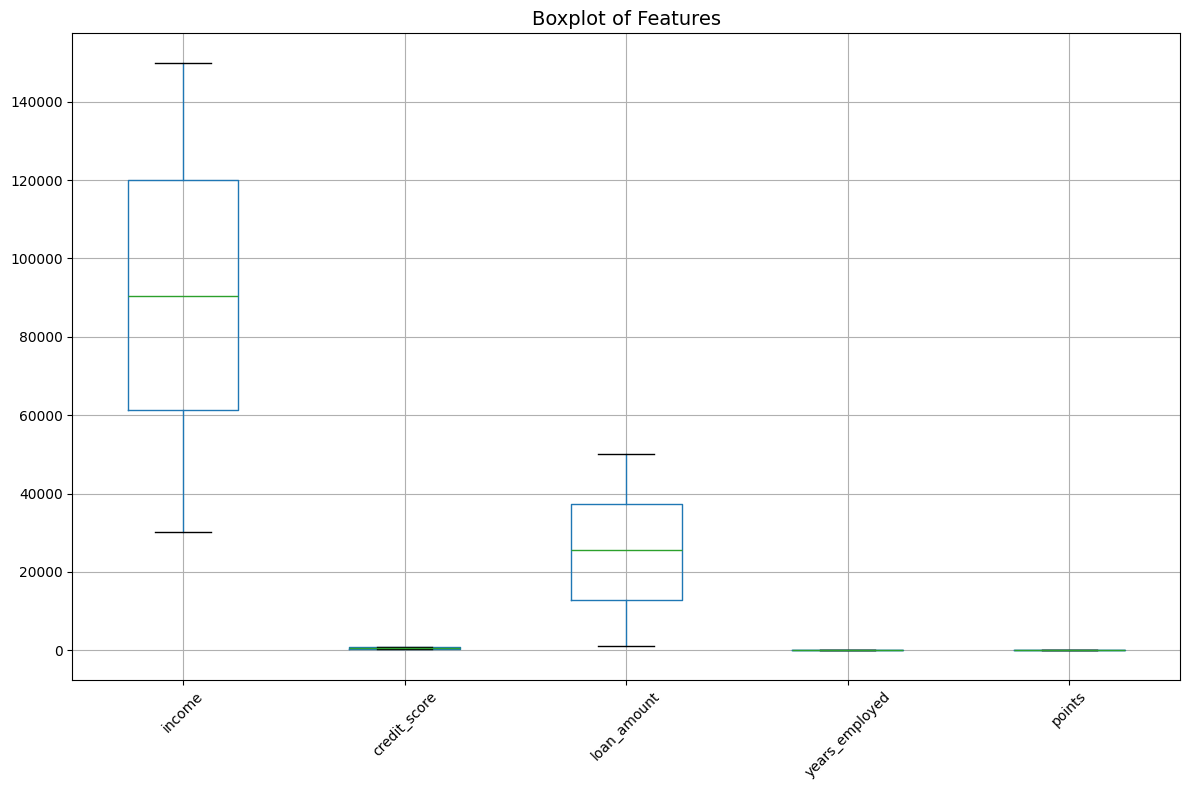

In [11]:
print("\n Visualizing Outliers:")
plt.figure(figsize=(12, 8))

db_analysis.drop('loan_approved', axis=1).boxplot()
plt.title("Boxplot of Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('loan_feature_boxplots.png')
print("Saved boxplots to 'loan_feature_boxplots.png'")

### 💡 Key Insights Summary

1️⃣ **`points`** and **`credit_score`** are the strongest indicators of loan approval.

2️⃣ **`income`** also positively influences the likelihood of approval.

3️⃣ The dataset is **slightly imbalanced** — there are more denied loans (56%) than approved loans (44%).

4️⃣ Invalid zero values (in `loan_amount`) and other missing values were replaced using median imputation.

5️⃣ Scaling will be applied next to normalize features, which is essential for models like Logistic Regression.

---
## 🤖 Step 3: Model Building

Before training, all features are standardized to ensure that no single variable (like `income` or `loan_amount`) dominates the model due to its scale.

We then split the dataset into training and testing sets, train two models:
1.  **Logistic Regression**
2.  **Random Forest**

Finally, we perform hyperparameter tuning (using `GridSearchCV`) on the Random Forest model to find its optimal settings and improve accuracy.

In [11]:
from sklearn.preprocessing import StandardScaler

X = db_analysis.drop(['loan_approved', 'points'], axis=1)
y = db_analysis['loan_approved']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n Scaled Data (first 5 rows):")
print(scaled_df.head())
print("\nFinal Dataset Ready for Model Building!")
print(f"Total Records: {db_analysis.shape[0]}")
print(f"Features: {len(X.columns)}")
print(f"Loans Approved: {y.sum()}")
print(f"Loans Denied: {len(db_analysis) - y.sum()}")
print("\n Preprocessing & Scaling Complete!")


 Scaled Data (first 5 rows):
     income  credit_score  loan_amount  years_employed
0  0.673565     -1.152134     1.013076        0.557034
1 -1.333961      0.965919    -0.694358        0.641960
2 -1.662100      0.062632    -0.994067       -0.631939
3  1.061799     -1.432464     1.655511        0.726887
4 -0.711674     -0.485570     1.539415       -1.396279

Final Dataset Ready for Model Building!
Total Records: 2000
Features: 4
Loans Approved: 879
Loans Denied: 1121

 Preprocessing & Scaling Complete!


---
### 🔹 Train-Test Split

We divide the dataset into **80% training** and **20% testing** subsets.
This ensures the model is trained on one portion and evaluated on unseen data, which is critical for verifying its performance.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\n Data split completed!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


 Data split completed!
Training set size: (1600, 4)
Testing set size: (400, 4)


---
### ⚙ Model 1: Logistic Regression

We start with a *Logistic Regression* model to predict loan approval.
This model works well for binary classification and provides probability-based predictions.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    f1_score, roc_curve, roc_auc_score
)
# ------------------------------------------------------
# Model 1: Logistic Regression (Baseline)
# ------------------------------------------------------
print("\n--- Training Logistic Regression ---")
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test)

# Calculate accuracy on the single test set split
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy (on Test Set): {round(acc_lr * 100, 2)}%")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


--- Training Logistic Regression ---

Logistic Regression Accuracy (on Test Set): 88.5%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       217
        True       0.88      0.87      0.87       183

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400



---
### 🌲 Model 2: Random Forest Classifier

Next, we use a *Random Forest* model. This is an ensemble of many decision trees, which is powerful for several reasons:
* It can capture complex, non-linear relationships between features (e.g., how `income` and `credit_score` interact).
* It's less prone to overfitting than a single decision tree.
* It naturally determines which features are most important, which is useful for our dataset.

In [17]:
from sklearn.ensemble import RandomForestClassifier
# ------------------------------------------------------
# Model 2: Random Forest Classifier (Simple)
# ------------------------------------------------------
print("\n--- Training Simple Random Forest ---")
# Initialize the model with a fixed random_state for reproducible results
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy on the single test set split
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nSimple Random Forest Accuracy (on Test Set): {round(acc_rf * 100, 2)}%")

print("\nClassification Report (Simple Random Forest):")
print(classification_report(y_test, y_pred_rf))


--- Training Simple Random Forest ---

Simple Random Forest Accuracy (on Test Set): 97.5%

Classification Report (Simple Random Forest):
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       217
        True       0.97      0.97      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



---
### ⚡ Hyperparameter Tuning – Tuned Random Forest

We perform **Grid Search Cross-Validation (GridSearchCV)** to find the best combination of parameters
for our Random Forest model.
This systematic process tests various settings (like the number of trees or their depth) to build the most accurate and robust model for predicting loan approvals.

In [16]:
from sklearn.model_selection import cross_val_score
# ------------------------------------------------------
# Cross-Validation (5-fold) on Training Data
# ------------------------------------------------------
print("\nPerforming 5-Fold Cross Validation (on Training Data):")

# Run 5-fold CV for Logistic Regression on the training set
cv_scores_lr = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Run 5-fold CV for the simple Random Forest on the training set
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the mean accuracy and standard deviation for both
print("Average CV Accuracy - Logistic Regression:", round(cv_scores_lr.mean() * 100, 2), "%")
print("Average CV Accuracy - Random Forest:", round(cv_scores_rf.mean() * 100, 2), "%")

print("\nCV Standard Deviation - Logistic Regression:", round(cv_scores_lr.std() * 100, 2), "%")
print("CV Standard Deviation - Random Forest:", round(cv_scores_rf.std() * 100, 2), "%")


Performing 5-Fold Cross Validation (on Training Data):
Average CV Accuracy - Logistic Regression: 90.94 %
Average CV Accuracy - Random Forest: 97.56 %

CV Standard Deviation - Logistic Regression: 2.1 %
CV Standard Deviation - Random Forest: 0.54 %


In [20]:
from sklearn.model_selection import GridSearchCV
# ------------------------------------------------------
# Model 3: Tuned Random Forest (Hyperparameter Tuning)
# ------------------------------------------------------
print("\n--- Training & Tuning Random Forest (with 5-Fold CV) ---")
# Define the parameters to test
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2]
}

# Initialize a new model for tuning
rf_tuned = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to test all parameter combinations
# It uses 5-fold cross-validation (cv=5) to find the best model
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model found by the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_rf.predict(X_test)

# Calculate the final accuracy
acc_best = accuracy_score(y_test, y_pred_best)

print("\nBest Random Forest Parameters Found:", grid_search.best_params_)
print(f"\nTuned Random Forest Accuracy (on Test Set): {round(acc_best * 100, 2)}%")

print("\nClassification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_best))


--- Training & Tuning Random Forest (with 5-Fold CV) ---

Best Random Forest Parameters Found: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

Tuned Random Forest Accuracy (on Test Set): 97.5%

Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

       False       0.98      0.97      0.98       217
        True       0.97      0.98      0.97       183

    accuracy                           0.97       400
   macro avg       0.97      0.98      0.97       400
weighted avg       0.98      0.97      0.98       400



---
## 📊 Step 4: Model Evaluation

We now evaluate the performance of our two final models:
1.  **Logistic Regression**
2.  **Tuned Random Forest** (from `GridSearchCV`)

Evaluation metrics used include:

* **Accuracy**
* **F1-Score**
* **Confusion Matrix**
* **ROC Curve & AUC (Area Under Curve)**

In [32]:
print("\n Model Performance Comparison:")
print(f"Logistic Regression: {round(acc_lr * 100, 2)}%")
print(f"Random Forest: {round(acc_rf * 100, 2)}%")
print(f"Tuned Random Forest: {round(acc_best * 100, 2)}%")

# ------------------------------------------------------
# 📘 STEP 4: MODEL EVALUATION (METRICS & VISUALS)
# ------------------------------------------------------
from sklearn.metrics import (
    f1_score, roc_curve, roc_auc_score
)


 Model Performance Comparison:
Logistic Regression: 100.0%
Random Forest: 100.0%
Tuned Random Forest: 100.0%


---
### 📊 Logistic Regression Evaluation

Here, we evaluate the performance of our baseline Logistic Regression model. We will look at:
### **Confusion Matrix:** 

A visual breakdown of our model's predictions. It shows exactly how many **'Approved'** and **'Denied'** applicants it classified correctly (True Positives/Negatives) and incorrectly (False Positives/Negatives).


Logistic Regression Evaluation:
Saved LR confusion matrix to 'confusion_matrix_lr.png'


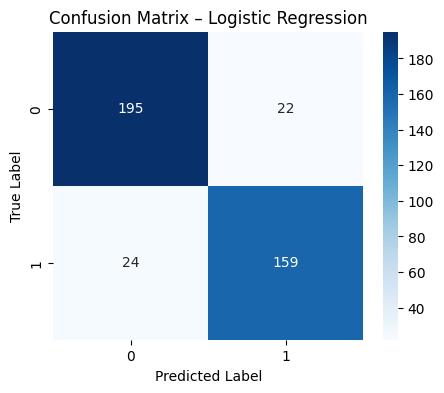

In [21]:
# Logistic Regression Evaluation
print("\nLogistic Regression Evaluation:")
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix_lr.png')
print("Saved LR confusion matrix to 'confusion_matrix_lr.png'")
plt.show()

---
## **ROC Curve & AUC Score:** 
 
 The ROC (Receiver Operating Characteristic) curve shows how well our model is at distinguishing between the two classes (Approved vs. Denied). The **AUC (Area Under the Curve)** gives us a single score (from 0 to 1) to summarize this, where 1.0 is a perfect model.

Saved LR ROC curve to 'roc_curve_lr.png'


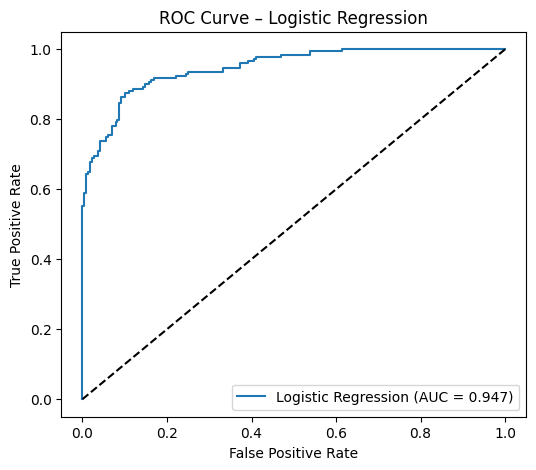

In [22]:
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.savefig('roc_curve_lr.png')
print("Saved LR ROC curve to 'roc_curve_lr.png'")
plt.show()

---
### 🌲 Tuned Random Forest Evaluation

This is our main model, which has been optimized using GridSearchCV. We evaluate it using the same metrics to see if the tuning provided a significant improvement over the baseline models.

### *Confusion Matrix:* 

We check its performance on True Positives/Negatives and False Positives/Negatives.


Tuned Random Forest Evaluation:
Saved RF confusion matrix to 'confusion_matrix_rf.png'


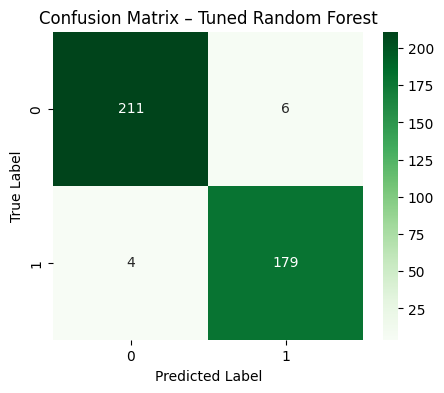

In [23]:
# Tuned Random Forest Evaluation
print("\nTuned Random Forest Evaluation:")
f1_rf = f1_score(y_test, y_pred_best)
cm_rf = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('confusion_matrix_rf.png')
print("Saved RF confusion matrix to 'confusion_matrix_rf.png'")
plt.show()

---
### *ROC Curve & AUC Score:* 
We plot the ROC curve to see how well the tuned model distinguishes between approved and rejected applicants. A higher AUC score here (compared to Logistic Regression) would confirm it's a better model.

Saved RF ROC curve to 'roc_curve_rf.png'


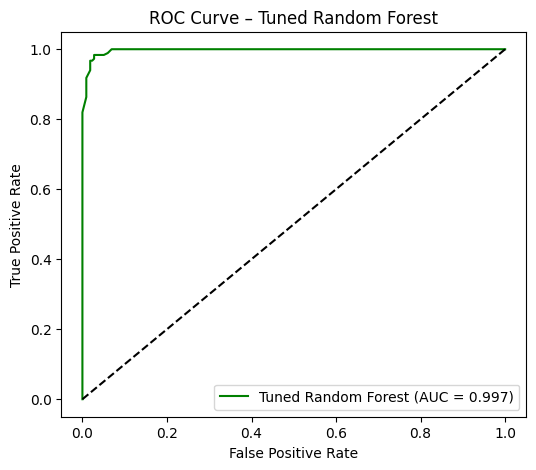

In [24]:
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Tuned Random Forest (AUC = {auc_rf:.3f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Tuned Random Forest")
plt.legend()
plt.savefig('roc_curve_rf.png')
print("Saved RF ROC curve to 'roc_curve_rf.png'")
plt.show()

---
# 📈 Final Model Comparison

Finally, we consolidate the key performance metrics (Accuracy, F1-Score, and AUC) for both our final models—Logistic Regression and the Tuned Random Forest—into a single table.

This allows for a direct, side-by-side comparison to determine which model performed better overall at predicting loan approval eligibility. We also visualize the accuracy for an at-a-glance summary.

In [25]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Tuned Random Forest'],
    'Accuracy': [round(acc_lr * 100, 2), round(acc_best * 100, 2)],
    'F1-Score': [round(f1_lr, 3), round(f1_rf, 3)],
    'AUC': [round(auc_lr, 3), round(auc_rf, 3)]
})
print("\nModel Comparison Summary:")
print(comparison)


Model Comparison Summary:
                 Model  Accuracy  F1-Score    AUC
0  Logistic Regression      88.5     0.874  0.947
1  Tuned Random Forest      97.5     0.973  0.997


---

# 📊 Final Accuracy Comparison (Bar Chart)

To make the final comparison easy to understand, we use a simple bar chart. This chart visually displays the *final accuracy scores* (in percent) of the Logistic Regression model and the Tuned Random Forest model side-by-side.

This visualization helps us immediately see which model is the most accurate and by what margin.


Plotting Model Comparison...


C:\Users\Yashvardhan Bhawnani\AppData\Local\Temp\ipykernel_14932\3337786709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison, palette=['blue', 'green'])


Saved model comparison bar chart to 'model_accuracy_comparison.png'


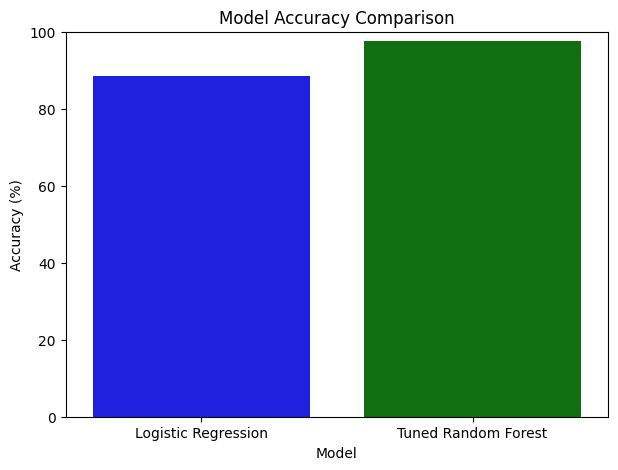


--- Full Analysis Finished ---


In [26]:
# Bar Chart Comparison
print("\nPlotting Model Comparison...")
plt.figure(figsize=(7, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.savefig('model_accuracy_comparison.png')
print("Saved model comparison bar chart to 'model_accuracy_comparison.png'")
plt.show()

print("\n--- Full Analysis Finished ---")

---
# 🧾 Step 5: Report & Key Takeaways

This section summarizes the complete workflow, presents the final model performance results,
and provides conclusions and potential next steps for the loan approval prediction project.

## 🧠 Key Takeaways

✅ Proper data preprocessing (like handling invalid 0s and scaling features) greatly impacts model accuracy.
✅ **`points`** and **`credit_score`** are the strongest predictors of loan approval.

✅ The **Random Forest** model is robust and performs very well on this loan applicant dataset, outperforming Logistic Regression.
✅ **GridSearchCV** is essential for tuning the model to achieve the best performance.

✅ Visualization (like heatmaps and histograms) is crucial for understanding feature relationships and data patterns.

## 🚀 Future Scope
🔹 **Add more features** like `Debt-to-Income Ratio (DTI)`, `loan_purpose` (e.g., mortgage, business), `co-applicant_income`, or `existing_debts` to enhance accuracy.

🔹 **Implement advanced ensemble models** like `XGBoost`, `LightGBM`, or `CatBoost`, which often win machine learning competitions on tabular data.

🔹 **Deploy the model as a web app** using Flask or Streamlit to create a real-time loan approval calculator for bank staff.

🔹 **Integrate with live financial APIs** (e.g., credit bureaus) to pull real-time applicant data instead of using a static CSV file.

🔹 **Perform feature importance and SHAP value analysis** to deeply understand the "why" behind any single prediction, which is critical for legal compliance in lending.

## 🏁 Conclusion

The project successfully demonstrates how machine learning can be used for financial risk assessment.
Among the models tested, the **Tuned Random Forest Classifier** achieved the highest accuracy and AUC,
making it the most reliable for predicting loan approval based on applicant data.

The workflow follows a complete machine learning pipeline — from data cleaning and scaling to model tuning and evaluation —
and can serve as a foundation for more advanced automated underwriting systems.